In [ ]:
import pandas as pd


## Read Dataframes

In [ ]:
df_2019 = pd.read_csv('../data/2019_INFO.csv')
df_2020 = pd.read_csv('../data/2020_INFO.csv')
df_2021 = pd.read_csv('../data/2021_INFO.csv')
df_2022 = pd.read_csv('../data/2022_INFO.csv')
df_2023 = pd.read_csv('../data/2023_INFO.csv')
df_2024 = pd.read_csv('../data/2024_INFO.csv')


/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_36389/1577800796.py:1: DtypeWarning:

Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_36389/1577800796.py:2: DtypeWarning:

Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_36389/1577800796.py:4: DtypeWarning:

Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/1j/zxqksxbs0bg17c_9cj2hm8bh0000gn/T/ipykernel_36389/1577800796.py:6: DtypeWarning:

Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.



## Prepare the data
### Drop Columns

In [ ]:
df_2019.drop(['Unnamed: 0', 'cross_street', 'nearby_distance'], axis=1, inplace=True)
df_2020.drop(['Unnamed: 0', 'cross_street', 'planned_date'], axis=1, inplace=True)
df_2021.drop(['Unnamed: 0', 'cross_street'], axis=1, inplace=True)
df_2022.drop(['Unnamed: 0', 'cross_street', 'is_charging_station', 'x_ride_code_support'], axis=1, inplace=True)
df_2023.drop(['Unnamed: 0', 'cross_street', 'rental_uris'], axis=1, inplace=True)
df_2024.drop(['Unnamed: 0', 'cross_street', 'rental_uris', 'V1', 'is_valet_station', 'x_valet_station_details'], axis=1, inplace=True)


### Clean Data

In [ ]:

#remove row with invalid post_code
df_2019 = df_2019[df_2019['post_code'] != 'J3y8Y9']

#remove invalid test rows name='Gera_Testing - 535'
df_2024 = df_2024[df_2024['name'] != 'Gera_Testing - 535']

#remove invalid station df_2022[df_2022['name'] == 'Planned-527']
df_2022 = df_2022[df_2022['name'] != 'Planned-527']

#remove invalid rows by keyword
key_words = ['prueba', 'test']
dfs = [df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
for word in key_words:
    for df in dfs:
        #print(df[df['name'].str.contains(word, case=False)])
        df.drop(df[df['name'].str.contains(word, case=False)].index, inplace=True)

#remove temporary stations e.g Merced
temporary_stations = [529, 530]
for df in dfs:
    df.drop(df[df['station_id'].isin(temporary_stations)].index, inplace=True)

### Convert Datatypes and filter info

In [ ]:
df_2019['date'] = pd.to_datetime(df_2019['date'])
df_2020['date'] = pd.to_datetime(df_2020['date'])
df_2021['date'] = pd.to_datetime(df_2021['date'])
df_2022['date'] = pd.to_datetime(df_2022['date'])
df_2023['date'] = pd.to_datetime(df_2023['date'])
df_2024['date'] = pd.to_datetime(df_2024['date'])


df_2019[df_2019['date'] == '2019-12-31']
df_2020[df_2020['date'] == '2020-12-31']
df_2021[df_2021['date'] == '2021-12-31']
df_2022[df_2022['date'] == '2022-12-31']
df_2023[df_2023['date'] == '2023-12-31']
df_2024[df_2024['date'] == '2024-12-31']

# postcode to int
df_2019['postcode'] = df_2019['post_code'].astype(int)
df_2020['postcode'] = df_2020['post_code'].astype(int)
df_2021['postcode'] = df_2021['post_code'].astype(int)
df_2022['postcode'] = df_2022['post_code'].astype(int)
df_2023['postcode'] = df_2023['post_code'].astype(int)
df_2024['postcode'] = df_2024['post_code'].astype(int)

#station_id to int
df_2019['station_id'] = df_2019['station_id'].astype(int)
df_2020['station_id'] = df_2020['station_id'].astype(int)
df_2021['station_id'] = df_2021['station_id'].astype(int)
df_2022['station_id'] = df_2022['station_id'].astype(int)
df_2023['station_id'] = df_2023['station_id'].astype(int)
df_2024['station_id'] = df_2024['station_id'].astype(int)


#### Add Year

In [ ]:
df_2019['year'] = 2019
df_2020['year'] = 2020
df_2021['year'] = 2021
df_2022['year'] = 2022
df_2023['year'] = 2023
df_2024['year'] = 2024


#### Max Date and Mean capacity

In [ ]:
df_2019['mean_capacity'] = df_2019.groupby('station_id')['capacity'].transform('mean')
df_2020['mean_capacity'] = df_2020.groupby('station_id')['capacity'].transform('mean')
df_2021['mean_capacity'] = df_2021.groupby('station_id')['capacity'].transform('mean')
df_2022['mean_capacity'] = df_2022.groupby('station_id')['capacity'].transform('mean')
df_2023['mean_capacity'] = df_2023.groupby('station_id')['capacity'].transform('mean')
df_2024['mean_capacity'] = df_2024.groupby('station_id')['capacity'].transform('mean')



In [ ]:
columns_to_keep = ['station_id', 'date', 'name', 'address', 'capacity', 'year', 'mean_capacity', 'post_code','lat','lon','altitude']
df_2019 = df_2019[columns_to_keep]
df_2020 = df_2020[columns_to_keep]
df_2021 = df_2021[columns_to_keep]
df_2022 = df_2022[columns_to_keep]
df_2023 = df_2023[columns_to_keep]
df_2024 = df_2024[columns_to_keep]

In [ ]:
df_2019_max_date = df_2019.loc[df_2019.groupby('station_id')['date'].idxmax()]
df_2020_max_date = df_2020.loc[df_2020.groupby('station_id')['date'].idxmax()]
df_2021_max_date = df_2021.loc[df_2021.groupby('station_id')['date'].idxmax()]
df_2022_max_date = df_2022.loc[df_2022.groupby('station_id')['date'].idxmax()]
df_2023_max_date = df_2023.loc[df_2023.groupby('station_id')['date'].idxmax()]
df_2024_max_date = df_2024.loc[df_2024.groupby('station_id')['date'].idxmax()]

### Concat DF in years_df

In [ ]:
df_years = pd.concat([df_2019_max_date, df_2020_max_date, df_2021_max_date, df_2022_max_date, df_2023_max_date, df_2024_max_date], ignore_index=True)
#order by date
df_years.sort_values(by='date', inplace=True)
#
print(df_years['year'].value_counts())


year
2022    511
2023    511
2021    510
2024    510
2020    508
2019    410
Name: count, dtype: int64


### Scatter Map

In [ ]:
import plotly.express as px

stations_count_by_year = df_years.groupby('year')['station_id'].count().values
total_bikes = df_years.groupby('year')['mean_capacity'].sum().values
min_capacity = df_years['mean_capacity'].min() 
max_capacity = df_years['mean_capacity'].max() 
# add threshold to color
print(min_capacity, max_capacity)
fig = px.scatter_mapbox(df_years, lat="lat", lon="lon", hover_name="station_id", hover_data=["address","post_code", "capacity", "altitude"], color='capacity',
                        #color_continuous_scale=px.colors.sequential.Viridis, 
                         zoom=11, height=630, width=800,animation_frame='year', title='Stations by Year', range_color=[min_capacity, max_capacity])
fig.update_layout(mapbox_style="open-street-map", margin={"r":0,"t":80,"l":0,"b":0},mapbox={"center": {"lat": 41.40484, "lon": 2.17482}}) 

for i, frame in enumerate(fig.frames):
    year = frame.name
    frame.layout.title = "Total Stations: {}".format(str(stations_count_by_year[i]) + " Total Bikes: " + str(int(total_bikes[i])) + " in  " + year)
    
for step in fig.layout.sliders[0].steps:
    step["args"][1]["frame"]["redraw"] = True
fig.show()


12.0 54.0


<img src="../assets/map.png" width="800" />

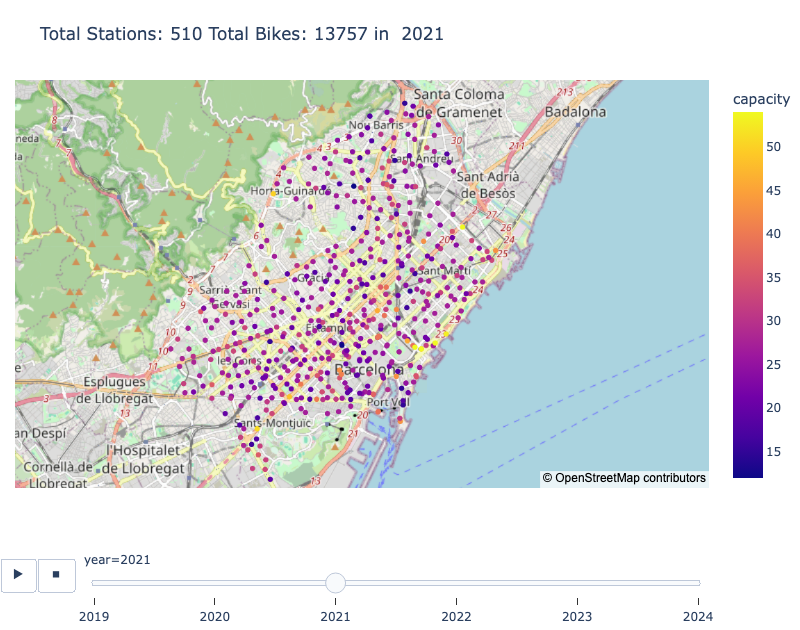

In [2]:
from IPython.display import Image
Image(filename="../assets/map.png")

In [ ]:
df_years[df_years['mean_capacity'] == 12]

,station_id,date,name,address,capacity,year,mean_capacity,post_code,lat,lon,altitude
1202,292,2022-01-01,"C/ AMILCAR, 1","C/ AMILCAR, 1",12.0,2021,12.0,8031,41.430016,2.172019,61
1712,292,2023-01-01,"C/ AMILCAR, 1","C/ AMILCAR, 1",12.0,2022,12.0,8031,41.430016,2.172019,61
2223,292,2024-01-01,"C/ AMILCAR, 1","C/ AMILCAR, 1",12.0,2023,12.0,8031,41.430016,2.172019,61
2734,292,2024-04-01,"C/ AMILCAR, 1","C/ AMILCAR, 1",12.0,2024,12.0,8031.0,41.430016,2.172019,61.0
